# Numerisk integrasjon intro

Som vi kjenner til fra matematiske fag, vil den *integrerte* av en funskjon $f(x)$ være en ny funksjon $I(x) = \int f(x) dx$. Et nokså intuitivt eksempel på bruk av integrasjon vil være beregne posisjonen til et objekt over tid med utgangspunkt i informasjon om objektets hastighet over tid, samt startposisjon.

> #### Eksempel 1:
> La oss si at vi triller en ball langs et flatt underlag, og kjenner til at ballens hastighet over tid kan skrives som
> $$v(t) =\begin{cases} 0 &, t<0 \\ 20\cdot e^{-\frac{t}{2}}&, 0\leq t \leq 10 \\ 0&, t>10 \end{cases}$$
> der $t=0$ er tidspunktet ballen starter å trille, og ballen slutter å trille etter $t=10$ sekund. For å finne finne ut hvor langt ballen trillet må vi integrere funksjonen $v(t)$ fra tidspunktet $t=0$ til $t=10$, som gir posisjonen $x(t)$ til ballen ved tidspunktet $t=10$. Dette formulerer vi matematisk som et ***bundet integral***:
>$$x(10) = \int_0^{10} 20\cdot e^{-\frac{t}{2}} \ dt $$
> En velkjent måte å visualisere denne regneoperasjonen er som å finne *arealet* under *kurven* $v(t)$:

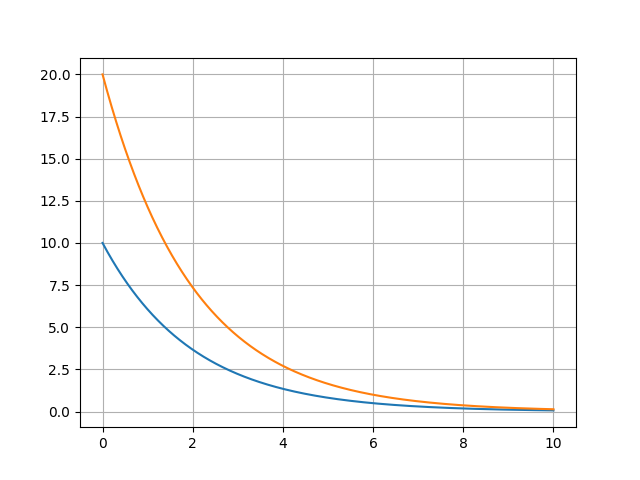

In [56]:
import numpy as np
import matplotlib.pyplot as plt
plt.close(1); plt.figure(1)
p0 = 0
v0 = 10

p = [p0]
v = [v0]

h = 0.01
t = np.linspace(0, 10, int(10/h+1))
for i in range(int(10/h)):
    p.append(p[-1] + h*v[-1])
    v.append(v[-1] - h*v[-1]*0.5)

plt.plot(t,np.array(v))
plt.plot(t,20*np.exp(-t*0.5))
plt.grid(True)

(-0.9960079893439915, 20.91616777622382)

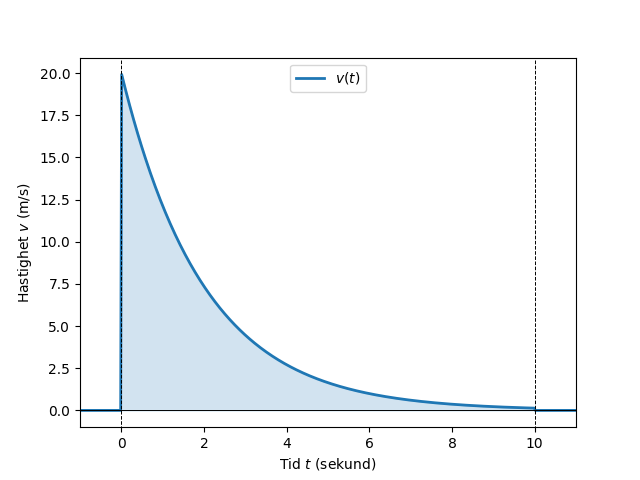

In [65]:
%matplotlib ipympl
plt.close(2); plt.figure(2)


def v(t):
    a = 0
    b = 10

    y = np.where((a<t)*(t<b), 20*np.exp(-t/2), 0)
    return y


t = np.linspace(-1, 11, 501)

plt.plot(t, v(t), label=r"$v(t)$", linewidth=2)
plt.fill_between(t, v(t), color='C0', alpha=0.2)#, label=r"$S=\int_0^{10} v(t) dt$")
plt.xlim([t[0], t[-1]])
plt.xlabel(r"Tid $t$ (sekund)")
plt.ylabel(r"Hastighet $v$ (m/s)")
plt.legend()
plt.plot([t[0], t[-1]], [0, 0], 'k', linewidth=0.7)
ylim = plt.gca().get_ylim()
plt.plot([0, 0], [-10, 50], 'k--', linewidth=0.7)
plt.plot([10, 10], [-10, 50], 'k--', linewidth=0.7)
plt.gca().set_ylim(ylim)